# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [0.001,0.1]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    #optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




results2 = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.Adam(lr=lr)
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # Collect results2
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag2 = "exp-lr-%s" % str(lr)
    results2[exp_name_tag2] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.6495 - accuracy: 0.7673 - val_loss: 1.8420 - val_accuracy: 0.5121
Epoch 50/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.6367 - accuracy: 0.7702 - val_loss: 1.8183 - val_accuracy: 0.5160
Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

50000/50000 [==============================] - 7s 148us/step - loss: 2.3063 - accuracy: 0.0989 - val_loss: 2.3053 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.3066 - accuracy: 0.0977 - val_loss: 2.3055 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.3072 - accuracy: 0.0989 - val_loss: 2.3060 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.3069 - accuracy: 0.1011 - val_loss: 2.3103 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.3068 - accuracy: 0.1001 - val_loss: 2.3075 - val_accuracy: 0.1000
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
______________________

50000/50000 [==============================] - 6s 125us/step - loss: 0.9621 - accuracy: 0.6607 - val_loss: 1.4341 - val_accuracy: 0.5146
Epoch 44/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.9512 - accuracy: 0.6639 - val_loss: 1.4098 - val_accuracy: 0.5208
Epoch 45/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.9366 - accuracy: 0.6708 - val_loss: 1.3459 - val_accuracy: 0.5369
Epoch 46/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.9271 - accuracy: 0.6762 - val_loss: 1.3583 - val_accuracy: 0.5342
Epoch 47/50
50000/50000 [==============================] - 6s 128us/step - loss: 0.9135 - accuracy: 0.6781 - val_loss: 1.4053 - val_accuracy: 0.5267
Epoch 48/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.8992 - accuracy: 0.6859 - val_loss: 1.3725 - val_accuracy: 0.5343
Epoch 49/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.8894 - accuracy: 0.6889 - val_loss:

Epoch 41/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.3042 - accuracy: 0.0987 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.3040 - accuracy: 0.0979 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.3041 - accuracy: 0.0982 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.3041 - accuracy: 0.1010 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.3041 - accuracy: 0.0990 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.3040 - accuracy: 0.0996 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.3044 - accuracy: 0.0975

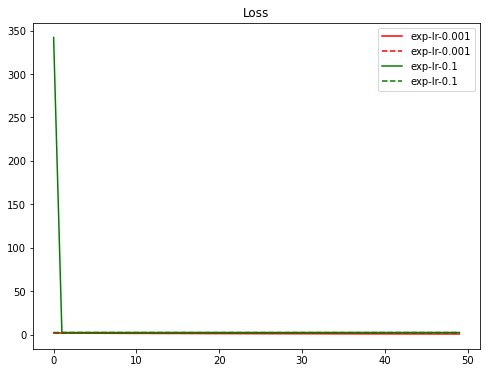

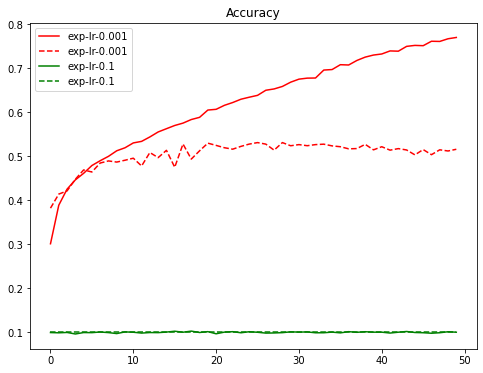

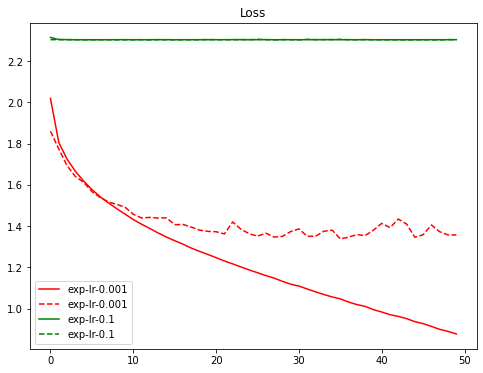

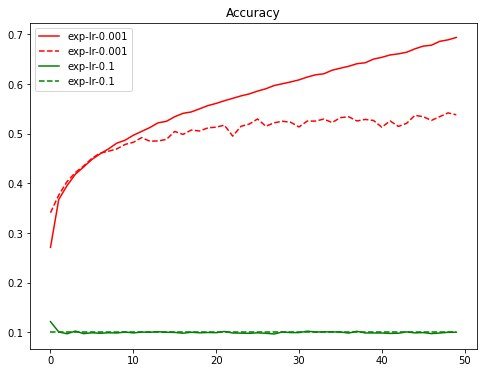

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()


plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-loss'])),results2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-loss'])),results2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-acc'])),results2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-acc'])),results2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()